In [152]:
#import libraries
import pandas as pd
import mpl_style
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#import sklearn packages
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

In [153]:
plt.style.use(mpl_style.style1)

In [154]:
#read data  
df = pd.read_csv('./exo.csv', index_col=False, skiprows=144)

In [155]:
df.head()


,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,...,koi_dicco_mdec,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,...,0.200,0.160,0.200,0.170,0.080,0.130,0.310,0.170,0.320,0.160
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,...,0.000,0.480,0.390,0.360,0.490,0.340,0.120,0.730,0.500,0.450
2,3,10811496,K00753.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0.000,0,...,-0.034,0.070,0.042,0.072,0.002,0.071,-0.027,0.074,0.027,0.074
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,...,0.147,0.078,0.289,0.079,-0.257,0.072,0.099,0.077,0.276,0.076
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,...,-0.090,0.180,0.100,0.140,0.070,0.180,0.020,0.160,0.070,0.200


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Columns: 141 entries, rowid to koi_dikco_msky_err
dtypes: float64(117), int64(7), object(17)
memory usage: 10.3+ MB


In [157]:
df.describe()

,rowid,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,...,koi_dicco_mdec,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err
count,9564.000000,9.564000e+03,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9110.000000,9110.000000,...,8965.000000,8965.000000,8965.000000,8965.000000,8994.000000,8994.000000,8994.000000,8994.000000,8994.000000,8994.000000
mean,4782.500000,7.690628e+06,0.480829,0.208595,0.232748,0.197512,0.120033,75.671358,0.002148,-0.002148,...,-0.045420,0.446229,1.866561,0.489930,-0.024244,0.425337,-0.076749,0.436684,1.812566,0.476060
std,2761.033321,2.653459e+06,0.476928,4.767290,0.422605,0.398142,0.325018,1334.744046,0.008236,0.008236,...,2.573558,0.569933,2.988742,0.646403,2.382286,0.602150,2.553758,0.567535,2.986376,0.647587
min,1.000000,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,0.000000,-0.172500,...,-75.900000,0.067000,0.000000,0.067000,-27.800000,0.067000,-76.600000,0.067000,0.000000,0.067000
25%,2391.750000,5.556034e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,0.000005,-0.000276,...,-0.387000,0.098000,0.170000,0.100000,-0.310000,0.087000,-0.390000,0.090000,0.210000,0.094000
50%,4782.500000,7.906892e+06,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,0.000035,-0.000035,...,0.000000,0.280000,0.610000,0.310000,-0.004000,0.250000,-0.017000,0.270000,0.583000,0.290000
75%,7173.250000,9.873066e+06,0.998000,0.000000,0.000000,0.000000,0.000000,40.715178,0.000276,-0.000005,...,0.300000,0.610000,2.160000,0.680000,0.290000,0.590000,0.300000,0.600000,1.970000,0.660000
max,9564.000000,1.293514e+07,1.000000,465.000000,1.000000,1.000000,1.000000,129995.778400,0.172500,0.000000,...,27.500000,22.000000,88.600000,32.000000,46.570000,33.000000,34.000000,22.000000,89.600000,32.000000


In [158]:

df.rename(columns={'kepid': 'KepID',
                    'kepoi_name': 'KOI Name',
                    'kepler_name': 'Kepler Name',
                    'koi_disposition': 'Exoplanet Archive Disposition',
                    'koi_vet_stat': 'Vetting Status',
                    'koi_vet_date': 'Date of Last Parameter Update',
                    'koi_pdisposition': 'Disposition Using Kepler Data',
                    'koi_score': 'Disposition Score',
                    'koi_fpflag_nt': 'Not Transit-Like False Positive Flag',
                    'koi_fpflag_ss': 'Stellar Eclipse False Positive Flag',
                    'koi_fpflag_co': 'Centroid Offset False Positive Flag',
                    'koi_fpflag_ec': 'Ephemeris Match Indicates Contamination False Positive Flag',
                    'koi_period': 'Orbital Period (days)',
                    'koi_period_err1': 'Orbital Period (days) Upper Unc.',
                    'koi_period_err2': 'Orbital Period (days) Lower Unc.',
                    'koi_period': 'Orbital Period (days)',
                    'koi_time0bk': 'Transit Epoch (BJD - 2,454,833 days)',
                    'koi_time0bk_err1': 'Transit Epoch (BJD - 2,454,833 days) Upper Unc.',
                    'koi_time0bk_err2': 'Transit Epoch (BJD - 2,454,833 days) Lower Unc.',
                    'koi_impact': 'Impact Parameter',
                    'koi_impact_err1': 'Impact Parameter Upper Unc.',
                    'koi_time0': 'Time of Transit Center (BJD - 2,454,833 days)',
                    'koi_time0_err1': 'Time of Transit Center (BJD - 2,454,833 days) Upper Unc.',
                    'koi_time0_err2': 'Time of Transit Center (BJD - 2,454,833 days) Lower Unc.',
                    'koi_eccen': 'Eccentricity',
                    'koi_eccen_err1': 'Eccentricity Upper Unc.',
                    'koi_eccen_err2': 'Eccentricity Lower Unc.',
                    'koi_longp': 'Longitude of Periastron',
                    'koi_longp_err1': 'Longitude of Periastron Upper Unc.',
                    'koi_longp_err2': 'Longitude of Periastron Lower Unc.',
                    'koi_longp': 'Longitude of Periastron',
                    'koi_longp_err1': 'Longitude of Periastron Upper Unc.',
                    'koi_longp_err2': 'Longitude of Periastron Lower Unc.',
                    'koi_duration':'TransitDuration[hrs]',
                    'koi_duration_err1':'TransitDurationUpperUnc.[hrs]',
                    'koi_duration_err2':'TransitDurationLowerUnc.[hrs]',
                    'koi_depth':'TransitDepth[ppm]',
                    'koi_depth_err1':'TransitDepthUpperUnc.[ppm]',
                    'koi_depth_err2':'TransitDepthLowerUnc.[ppm]',
                    'koi_prad':'PlanetaryRadius[Earth radii]',
                    'koi_prad_err1':'PlanetaryRadiusUpperUnc.[Earth radii]',
                    'koi_prad_err2':'PlanetaryRadiusLowerUnc.[Earth radii]',
                    'koi_teq':'EquilibriumTemperature[K]',
                    'koi_teq_err1':'EquilibriumTemperatureUpperUnc.[K]',
                    'koi_teq_err2':'EquilibriumTemperatureLowerUnc.[K]',
                    'koi_insol':'InsolationFlux[Earthflux]',
                    'koi_insol_err1':'InsolationFluxUpperUnc.[Earthflux]',
                    'koi_insol_err2':'InsolationFluxLowerUnc.[Earthflux]',
                    'koi_model_snr':'TransitSignal-to-Nois',
                    'koi_tce_plnt_num':'TCEPlanetNumbe',
                    'koi_tce_delivname':'TCEDeliver',
                    'koi_steff':'StellarEffectiveTemperature[K]',
                    'koi_steff_err1':'StellarEffectiveTemperatureUpperUnc.[K]',
                    'koi_steff_err2':'StellarEffectiveTemperatureLowerUnc.[K]',
                    'koi_slogg':'StellarSurfaceGravity[log10(cm/s**2)]',
                    'koi_slogg_err1':'StellarSurfaceGravityUpperUnc.[log10(cm/s**2)]',
                    'koi_slogg_err2':'StellarSurfaceGravityLowerUnc.[log10(cm/s**2)]',
                    'koi_srad':'StellarRadius[Solar radii]',
                    'koi_srad_err1':'StellarRadiusUpperUnc.[Solar radii]',
                    'koi_srad_err2':'StellarRadiusLowerUnc.[Solar radii]',
                    'ra':'RA [decimal degrees]',
                    'dec':'Dec [decimal degrees]',
                    'koi_kepmag':'Kepler-band[mag]'
                    }, inplace=True)


In [159]:
for col in df.columns:
    print(col)

rowid
KepID
KOI Name
Kepler Name
Exoplanet Archive Disposition
Vetting Status
Date of Last Parameter Update
Disposition Using Kepler Data
Disposition Score
Not Transit-Like False Positive Flag
Stellar Eclipse False Positive Flag
Centroid Offset False Positive Flag
Ephemeris Match Indicates Contamination False Positive Flag
koi_disp_prov
koi_comment
Orbital Period (days)
Orbital Period (days) Upper Unc.
Orbital Period (days) Lower Unc.
Transit Epoch (BJD - 2,454,833 days)
Transit Epoch (BJD - 2,454,833 days) Upper Unc.
Transit Epoch (BJD - 2,454,833 days) Lower Unc.
Time of Transit Center (BJD - 2,454,833 days)
Time of Transit Center (BJD - 2,454,833 days) Upper Unc.
Time of Transit Center (BJD - 2,454,833 days) Lower Unc.
Eccentricity
Eccentricity Upper Unc.
Eccentricity Lower Unc.
Longitude of Periastron
Longitude of Periastron Upper Unc.
Longitude of Periastron Lower Unc.
Impact Parameter
Impact Parameter Upper Unc.
koi_impact_err2
TransitDuration[hrs]
TransitDurationUpperUnc.[hrs]
T

In [160]:
df['ExoPlanetCandidate'] = df['Disposition Using Kepler Data'].apply(lambda x: 1 if x == 'CANDIDATE' else 0)
df['ExoPlanetCandidate'] = df['Exoplanet Archive Disposition'].apply(lambda x: 2 if x == 'CONFIRMED' else 1 if x == 'CANDIDATE' else 0 )

In [161]:
df.head()

,rowid,KepID,KOI Name,Kepler Name,Exoplanet Archive Disposition,Vetting Status,Date of Last Parameter Update,Disposition Using Kepler Data,Disposition Score,Not Transit-Like False Positive Flag,...,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err,ExoPlanetCandidate
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,...,0.160,0.200,0.170,0.080,0.130,0.310,0.170,0.320,0.160,2
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,...,0.480,0.390,0.360,0.490,0.340,0.120,0.730,0.500,0.450,2
2,3,10811496,K00753.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0.000,0,...,0.070,0.042,0.072,0.002,0.071,-0.027,0.074,0.027,0.074,1
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,...,0.078,0.289,0.079,-0.257,0.072,0.099,0.077,0.276,0.076,0
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,...,0.180,0.100,0.140,0.070,0.180,0.020,0.160,0.070,0.200,2


In [162]:
df.isna().any()

rowid                            False
KepID                            False
KOI Name                         False
Kepler Name                       True
Exoplanet Archive Disposition    False
                                 ...  
koi_dikco_mdec                    True
koi_dikco_mdec_err                True
koi_dikco_msky                    True
koi_dikco_msky_err                True
ExoPlanetCandidate               False
Length: 142, dtype: bool

In [163]:
#deal with missing values
# df.dropna(inplace=True)

In [164]:
df.describe()

,rowid,KepID,Disposition Score,Not Transit-Like False Positive Flag,Stellar Eclipse False Positive Flag,Centroid Offset False Positive Flag,Ephemeris Match Indicates Contamination False Positive Flag,Orbital Period (days),Orbital Period (days) Upper Unc.,Orbital Period (days) Lower Unc.,...,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err,ExoPlanetCandidate
count,9564.000000,9.564000e+03,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9110.000000,9110.000000,...,8965.000000,8965.000000,8965.000000,8994.000000,8994.000000,8994.000000,8994.000000,8994.000000,8994.000000,9564.000000
mean,4782.500000,7.690628e+06,0.480829,0.208595,0.232748,0.197512,0.120033,75.671358,0.002148,-0.002148,...,0.446229,1.866561,0.489930,-0.024244,0.425337,-0.076749,0.436684,1.812566,0.476060,0.780636
std,2761.033321,2.653459e+06,0.476928,4.767290,0.422605,0.398142,0.325018,1334.744046,0.008236,0.008236,...,0.569933,2.988742,0.646403,2.382286,0.602150,2.553758,0.567535,2.986376,0.647587,0.862851
min,1.000000,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,0.000000,-0.172500,...,0.067000,0.000000,0.067000,-27.800000,0.067000,-76.600000,0.067000,0.000000,0.067000,0.000000
25%,2391.750000,5.556034e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,0.000005,-0.000276,...,0.098000,0.170000,0.100000,-0.310000,0.087000,-0.390000,0.090000,0.210000,0.094000,0.000000
50%,4782.500000,7.906892e+06,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,0.000035,-0.000035,...,0.280000,0.610000,0.310000,-0.004000,0.250000,-0.017000,0.270000,0.583000,0.290000,0.000000
75%,7173.250000,9.873066e+06,0.998000,0.000000,0.000000,0.000000,0.000000,40.715178,0.000276,-0.000005,...,0.610000,2.160000,0.680000,0.290000,0.590000,0.300000,0.600000,1.970000,0.660000,2.000000
max,9564.000000,1.293514e+07,1.000000,465.000000,1.000000,1.000000,1.000000,129995.778400,0.172500,0.000000,...,22.000000,88.600000,32.000000,46.570000,33.000000,34.000000,22.000000,89.600000,32.000000,2.000000


In [165]:
# p = sns.countplot(x='StellarRadius[Solar radii]', data=df, palette='muted')
# _ = plt.setp(p.get_xticklabels(), rotation=90)

# p = sns.countplot(x='StellarEffectiveTemperature[K]', data=df, hue='ExoPlanetCandidate', palette='muted')

In [166]:
print('minimum right ascension: ' + str(df['RA [decimal degrees]'].min()))
print('maximum right ascension: ' + str(df['RA [decimal degrees]'].max()))


minimum right ascension: 279.85272
maximum right ascension: 301.72076


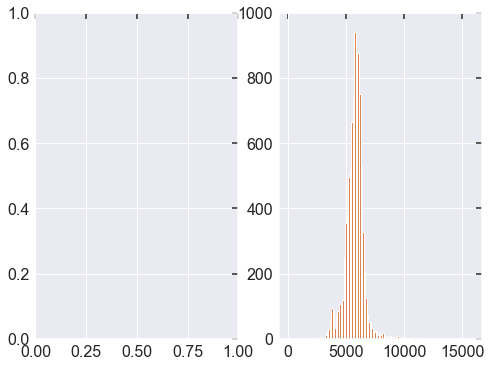

In [167]:
fig, ax = plt.subplots(1, 2)
ax[0] = plt.hist(df['StellarRadius[Solar radii]'], bins=100)
ax[1] = plt.hist(df['StellarEffectiveTemperature[K]'], bins=100)



# plt.hist(df['StellarRadius[Solar radii]'], bins=1000, alpha=0.5)
# plt.hist(df['StellarEffectiveTemperature[K]'], bins=1000, alpha=0.5)
plt.ylim(0, 1000)

plt.show()

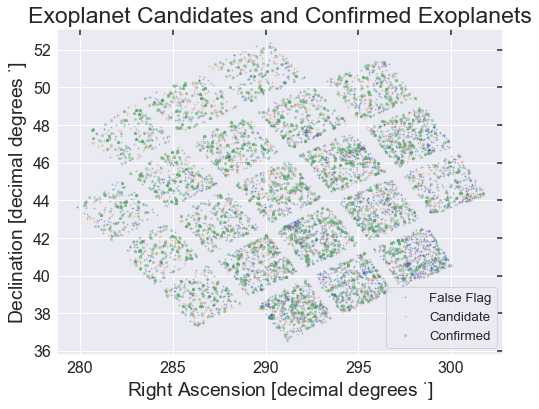

In [168]:
plt.figsize=(40, 40)
#plt.plot(df['RA [decimal degrees]'], df['Dec [decimal degrees]'], 'o', markersize=0.5, alpha=0.3)
#plot right ascension and declination for data points that are either confirmed or candidates
plt.plot(df[df['ExoPlanetCandidate'] == 0]['RA [decimal degrees]'], df[df['ExoPlanetCandidate'] == 0]['Dec [decimal degrees]'], 'o', markersize=1, alpha=0.3)
plt.plot(df[df['ExoPlanetCandidate'] == 1]['RA [decimal degrees]'], df[df['ExoPlanetCandidate'] == 1]['Dec [decimal degrees]'], '+', markersize=3, alpha=0.3)
plt.plot(df[df['ExoPlanetCandidate'] == 2]['RA [decimal degrees]'], df[df['ExoPlanetCandidate'] == 2]['Dec [decimal degrees]'], '*', markersize=3, alpha=0.3)
plt.xlabel('Right Ascension [decimal degrees $^{\cdot}$]')
plt.ylabel('Declination [decimal degrees $^{\cdot}$]')
plt.title('Exoplanet Candidates and Confirmed Exoplanets')
plt.legend(['False Flag', 'Candidate', 'Confirmed'], loc='lower right', fontsize='smaller')

In [169]:
#plot a correlation matrix of the kepler data
# corr = df.corr()
# plt.figure(figsize=(20,20))
# sns.heatmap(corr, annot=False, fmt='.2f', cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()

In [170]:
df.head()

,rowid,KepID,KOI Name,Kepler Name,Exoplanet Archive Disposition,Vetting Status,Date of Last Parameter Update,Disposition Using Kepler Data,Disposition Score,Not Transit-Like False Positive Flag,...,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err,ExoPlanetCandidate
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,...,0.160,0.200,0.170,0.080,0.130,0.310,0.170,0.320,0.160,2
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,...,0.480,0.390,0.360,0.490,0.340,0.120,0.730,0.500,0.450,2
2,3,10811496,K00753.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0.000,0,...,0.070,0.042,0.072,0.002,0.071,-0.027,0.074,0.027,0.074,1
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,...,0.078,0.289,0.079,-0.257,0.072,0.099,0.077,0.276,0.076,0
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,...,0.180,0.100,0.140,0.070,0.180,0.020,0.160,0.070,0.200,2


In [171]:
#remove rows and columns that do not have a high correlation with the exoplanet candidate
corr = df.corr()
corr = corr[corr['ExoPlanetCandidate'] > 0.1]
corr = corr[corr.index]
corr = corr.drop(['ExoPlanetCandidate'], axis=0)


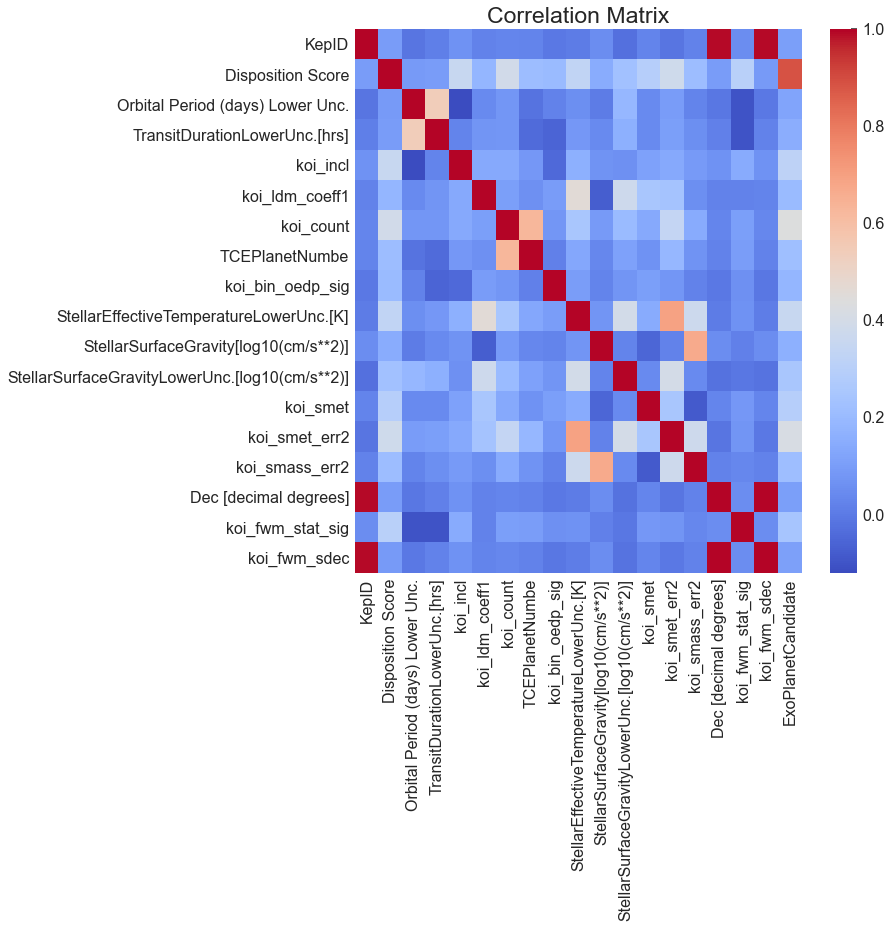

In [172]:
corr.head()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=False, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [173]:
df_dropped = df.copy()
df_dropped.head()

,rowid,KepID,KOI Name,Kepler Name,Exoplanet Archive Disposition,Vetting Status,Date of Last Parameter Update,Disposition Using Kepler Data,Disposition Score,Not Transit-Like False Positive Flag,...,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err,ExoPlanetCandidate
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,...,0.160,0.200,0.170,0.080,0.130,0.310,0.170,0.320,0.160,2
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,...,0.480,0.390,0.360,0.490,0.340,0.120,0.730,0.500,0.450,2
2,3,10811496,K00753.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0.000,0,...,0.070,0.042,0.072,0.002,0.071,-0.027,0.074,0.027,0.074,1
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,...,0.078,0.289,0.079,-0.257,0.072,0.099,0.077,0.276,0.076,0
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,...,0.180,0.100,0.140,0.070,0.180,0.020,0.160,0.070,0.200,2


In [174]:
df_dropped.drop(columns=['Kepler Name','KOI Name','EquilibriumTemperatureUpperUnc.[K]',
                 'KepID','Exoplanet Archive Disposition','Disposition Using Kepler Data',
                 'Not Transit-Like False Positive Flag','Centroid Offset False Positive Flag',
                 'Ephemeris Match Indicates Contamination False Positive Flag','TCEDeliver',
                 'EquilibriumTemperatureLowerUnc.[K]'], inplace=True)

In [175]:
df_dropped.head()

,rowid,Vetting Status,Date of Last Parameter Update,Disposition Score,Stellar Eclipse False Positive Flag,koi_disp_prov,koi_comment,Orbital Period (days),Orbital Period (days) Upper Unc.,Orbital Period (days) Lower Unc.,...,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err,ExoPlanetCandidate
0,1,Done,2018-08-16,1.000,0,q1_q17_dr25_sup_koi,NO_COMMENT,9.488036,2.775000e-05,-2.775000e-05,...,0.160,0.200,0.170,0.080,0.130,0.310,0.170,0.320,0.160,2
1,2,Done,2018-08-16,0.969,0,q1_q17_dr25_sup_koi,NO_COMMENT,54.418383,2.479000e-04,-2.479000e-04,...,0.480,0.390,0.360,0.490,0.340,0.120,0.730,0.500,0.450,2
2,3,Done,2018-08-16,0.000,0,q1_q17_dr25_sup_koi,DEEP_V_SHAPED,19.899140,1.494000e-05,-1.494000e-05,...,0.070,0.042,0.072,0.002,0.071,-0.027,0.074,0.027,0.074,1
3,4,Done,2018-08-16,0.000,1,q1_q17_dr25_sup_koi,MOD_ODDEVEN_DV---MOD_ODDEVEN_ALT---DEEP_V_SHAPED,1.736952,2.630000e-07,-2.630000e-07,...,0.078,0.289,0.079,-0.257,0.072,0.099,0.077,0.276,0.076,0
4,5,Done,2018-08-16,1.000,0,q1_q17_dr25_sup_koi,NO_COMMENT,2.525592,3.761000e-06,-3.761000e-06,...,0.180,0.100,0.140,0.070,0.180,0.020,0.160,0.070,0.200,2


In [176]:
def clean_data(df):
    assert isinstance(df, pd.DataFrame), "df needs to be the correct type"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)


    return df[indices_to_keep].astype(np.float64)

clean_data(df_dropped)

,rowid,Vetting Status,Date of Last Parameter Update,Disposition Score,Stellar Eclipse False Positive Flag,koi_disp_prov,koi_comment,Orbital Period (days),Orbital Period (days) Upper Unc.,Orbital Period (days) Lower Unc.,...,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err,ExoPlanetCandidate


In [177]:
# Remove outliers from df_dropped using 3 standard deviations using a function
from scipy import stats

def remove_outliers(df):
    assert isinstance(df, pd.DataFrame), "df needs to be the correct type"
    df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
    return df

df_dropped = remove_outliers(df_dropped)




In [178]:
sns.set_theme(style="darkgrid")
sns.set_style("dark")
sns.set(rc={'figure.figsize':(8.7,12.27)})
sns.countplot(x='Stellar Eclipse False Positive Flag', data=df_dropped, palette='muted')


ValueError: min() arg is an empty sequence

Text(0.5, 0, 'Stellar Effective Temperature [K]')

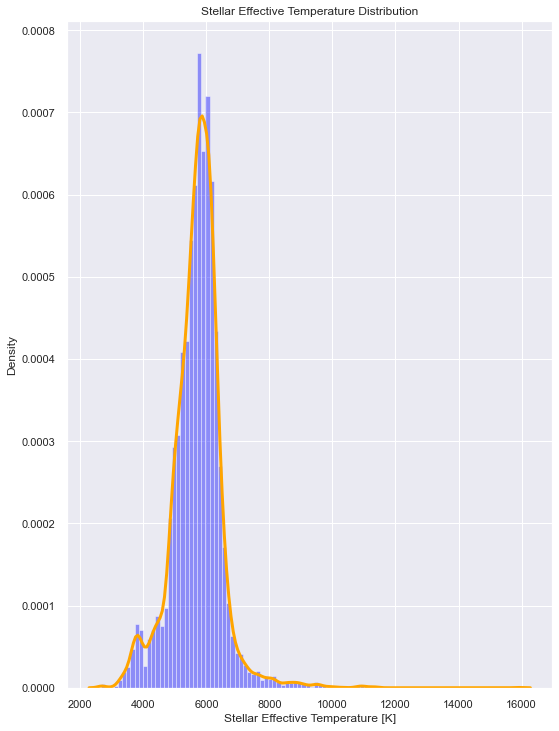

In [ ]:
sns.distplot(df_dropped['StellarEffectiveTemperature[K]'], bins=100, color='blue', kde_kws={"color": "orange", "lw": 3, "label": "KDE"})
plt.title('Stellar Effective Temperature Distribution')
plt.xlabel('Stellar Effective Temperature [K]')

Text(0.5, 1.0, 'Histogram of Orbital Periods')

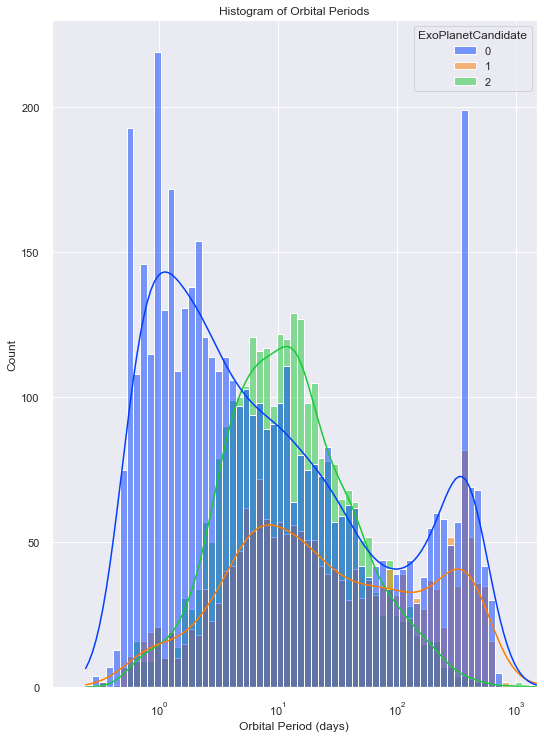

In [ ]:
# plot the log scale of the oribital periods in a histogram using seaborn
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(8.7,12.27)})
sns.histplot(x='Orbital Period (days)', data=df_dropped, log_scale=True, palette="bright", hue='ExoPlanetCandidate', kde=True, bins=100, alpha=0.5)
plt.xlim(0, 1500)
plt.title('Histogram of Orbital Periods')

(0.0, 1500.0)

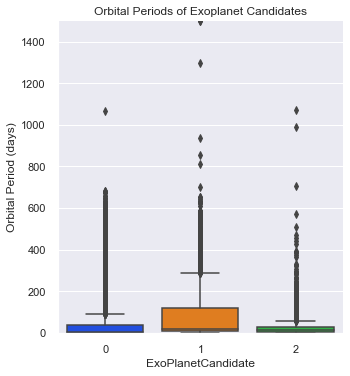

In [ ]:
# Create a seaborn catergorical plot of the oribital periods and the exoplanet candidate
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(8.7,12.27)})
sns.catplot(x='ExoPlanetCandidate', y='Orbital Period (days)', data=df_dropped, kind='box', palette='bright')
plt.title('Orbital Periods of Exoplanet Candidates')
plt.ylim(0, 1500)


(0.1, 1500)

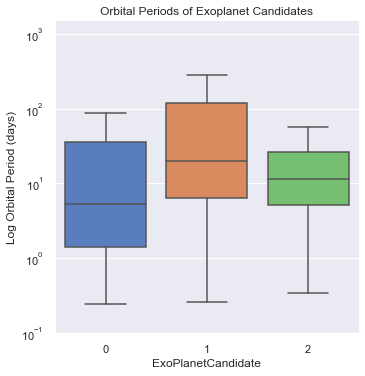

In [ ]:
# Create categorical Plot of the Log Scale Orbital Period versus Number of Planets
sns.catplot(x='ExoPlanetCandidate', y='Orbital Period (days)', data=df_dropped, kind='box', palette='muted', showfliers=False)
plt.title('Orbital Periods of Exoplanet Candidates')
plt.yscale('log')
plt.ylabel('Log Orbital Period (days)')
plt.ylim(0.1, 1500)

In [ ]:
# Convert categorical data to numerical data using a function
def convert_categorical(df):
    assert isinstance(df, pd.DataFrame), "df needs to be the correct type"
    df = pd.get_dummies(df, columns=['Stellar Eclipse False Positive Flag'])
    return df

convert_categorical(df_dropped)

,rowid,Vetting Status,Disposition Score,koi_disp_prov,koi_comment,Orbital Period (days),Orbital Period (days) Upper Unc.,Orbital Period (days) Lower Unc.,"Transit Epoch (BJD - 2,454,833 days)","Transit Epoch (BJD - 2,454,833 days) Upper Unc.",...,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err,ExoPlanetCandidate,Stellar Eclipse False Positive Flag_0,Stellar Eclipse False Positive Flag_1
0,1,0,649,q1_q17_dr25_sup_koi,NO_COMMENT,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,...,0.170,0.080,0.130,0.310,0.170,0.320,0.160,2,1,0
1,2,0,618,q1_q17_dr25_sup_koi,NO_COMMENT,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,0.360,0.490,0.340,0.120,0.730,0.500,0.450,2,1,0
2,3,0,0,q1_q17_dr25_sup_koi,DEEP_V_SHAPED,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,...,0.072,0.002,0.071,-0.027,0.074,0.027,0.074,1,1,0
3,4,0,0,q1_q17_dr25_sup_koi,MOD_ODDEVEN_DV---MOD_ODDEVEN_ALT---DEEP_V_SHAPED,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,0.079,-0.257,0.072,0.099,0.077,0.276,0.076,0,0,1
4,5,0,649,q1_q17_dr25_sup_koi,NO_COMMENT,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,...,0.140,0.070,0.180,0.020,0.160,0.070,0.200,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,9560,0,0,q1_q17_dr25_sup_koi,MOD_SEC_DV---PLANET_OCCULT_DV---MOD_SEC_ALT---...,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,...,0.074,2.344,0.072,-1.756,0.068,2.929,0.072,0,0,1
9560,9561,0,296,q1_q17_dr25_sup_koi,NO_COMMENT,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,...,0.460,0.500,0.400,-0.180,0.470,0.530,0.470,1,1,0
9561,9562,0,21,q1_q17_dr25_sup_koi,CENT_RESOLVED_OFFSET,0.681402,2.434000e-06,-2.434000e-06,132.181750,0.002850,...,0.220,3.380,0.160,-3.890,0.260,5.160,0.220,0,1,0
9562,9563,0,74,q1_q17_dr25_sup_koi,ALL_TRANS_CHASES---CENT_SATURATED,333.486169,4.235000e-03,-4.235000e-03,153.615010,0.005070,...,0.530,1.450,0.110,1.370,0.660,2.000,0.460,1,1,0


In [ ]:
# Define a function to remove all non-numerical data from df_dropped
def remove_non_numerical(df):
    assert isinstance(df, pd.DataFrame), "df needs to be the correct type"
    df = df.select_dtypes(include='number')
    return df

df_dropped = remove_non_numerical(df_dropped)

In [ ]:
# Apply feature selection to the data
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

# Create a function to apply feature selection to the data
def feature_selection(df, k):
    assert isinstance(df, pd.DataFrame), "df needs to be the correct type"
    assert isinstance(k, int), "k needs to be the correct type" # k is the number of features to select
    X = df.drop(['ExoPlanetCandidate'], axis=1)
    y = df['ExoPlanetCandidate']
    #X = StandardScaler().fit_transform(X)
    #X = SelectKBest(f_classif, k=k).fit_transform(X, y)
    return X, y

# Apply feature selection to the data
X, y = feature_selection(df_dropped, 10)


In [ ]:
# Apply test train split to the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [ ]:
# Apply a random forest classifier to the data
X_train = X_train.fillna(0).replace([np.inf, -np.inf], np.nan)
X_test = X_test.fillna(0).replace([np.inf, -np.inf], np.nan)
y_train = y_train.fillna(0).replace([np.inf, -np.inf], np.nan)
y_test = y_test.fillna(0).replace([np.inf, -np.inf], np.nan)

X_train = X_train.dropna()
X_test = X_test.dropna()
y_train = y_train.dropna()
y_test = y_test.dropna()

rf = RandomForestClassifier(random_state=21)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=21)

In [ ]:
# Check the accuracy of the model
y_pred = rf.predict(X_test)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy of random forest classifier on test set: 0.88


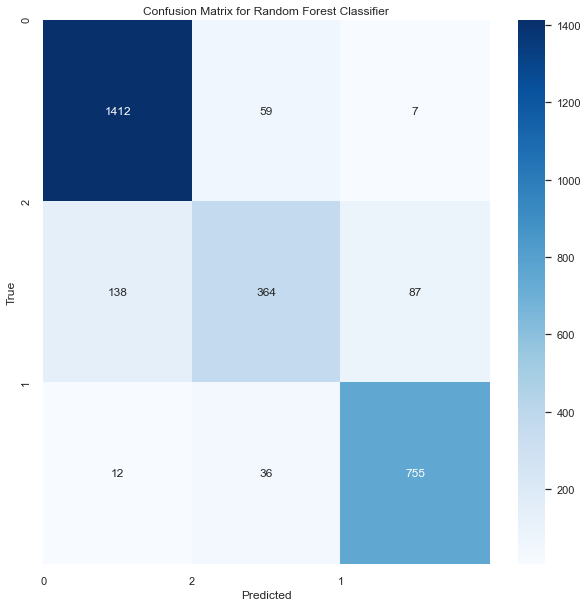

In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

# Reset sns style
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style("darkgrid")
# Plot the confusion matrix
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
#Apply actual labels to the confusion matrix axis
tick_marks = np.arange(len(y_test.unique()))
plt.xticks(tick_marks, y_test.unique())
plt.yticks(tick_marks, y_test.unique())

# Add a title
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()


In [ ]:
# Create a classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1478
           1       0.79      0.62      0.69       589
           2       0.89      0.94      0.91       803

    accuracy                           0.88      2870
   macro avg       0.86      0.84      0.85      2870
weighted avg       0.88      0.88      0.88      2870



In [179]:
# Improve the model using a CV Grid Search
from sklearn.model_selection import GridSearchCV

# Create a function to apply a grid search to the data
# def grid_search(X, y, model, param_grid, cv):
#     assert isinstance(X, pd.DataFrame), "X needs to be the correct type"
#     assert isinstance(y, pd.Series), "y needs to be the correct type"
#     assert isinstance(model, object), "model needs to be the correct type"
#     assert isinstance(param_grid, dict), "param_grid needs to be the correct type"
#     assert isinstance(cv, int), "cv needs to be the correct type"
#     grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv)
#     grid.fit(X, y)
#     return grid.best_score_, grid.best_estimator_

# Create a function to apply a random grid search to the data that runs in a sensible amount of time
def grid_search(X, y, model, param_grid, cv):
    assert isinstance(X, pd.DataFrame), "X needs to be the correct type"
    assert isinstance(y, pd.Series), "y needs to be the correct type"
    assert isinstance(model, object), "model needs to be the correct type"
    assert isinstance(param_grid, dict), "param_grid needs to be the correct type"
    assert isinstance(cv, int), "cv needs to be the correct type"
    grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, n_jobs=-1, verbose=2)
    grid.fit(X, y)
    return grid.best_score_, grid.best_estimator_

#track progress of grid search
from sklearn.metrics import make_scorer, f1_score
f1 = make_scorer(f1_score , average='weighted')


# Apply a grid search to the data
param_grid = {'n_estimators': [100, 200, 300, 400, 500],
              #'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth': [4, 5, 6, 7, 8],
              #'criterion': ['gini', 'entropy']}
            }
best_score, best_model = grid_search(X_train, y_train, rf, param_grid, 5)
print('Best score: ' + str(best_score))

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:  1.5min finished


Best score: 0.8706305377035491


In [180]:
# Output the best model
print(best_model)


RandomForestClassifier(max_depth=8, n_estimators=200, random_state=21)


In [182]:
# Save the best model
import pickle
filename = 'best_rf_model.sav'
pickle.dump(best_model, open(filename, 'wb'))



In [185]:
# Create a second round of grid search using the best model from the first round, but now altering max_features and criterion
param_grid = {'n_estimators': [200],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth': [8],
              'criterion': ['gini', 'entropy']}
best_score2, best_model2 = grid_search(X_train, y_train, best_model, param_grid, 5)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   19.0s finished


Best score: 0.8706305377035491
RandomForestClassifier(max_depth=8, n_estimators=200, random_state=21)


In [192]:
print('Best score for model 2: ' + str(best_score2))
#print the best combination of max_features and criterion
print(best_model2)

Best score for model 2: 0.8706305377035491
RandomForestClassifier(max_depth=8, n_estimators=200, random_state=21)


In [188]:
# Create an adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=21)
ada.fit(X_train, y_train)


AdaBoostClassifier(random_state=21)

In [189]:
# Check the accuracy of the model
y_pred = ada.predict(X_test)
print('Accuracy of AdaBoost classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))


Accuracy of AdaBoost classifier on test set: 0.85


In [ ]:
# Create a pipeline to apply a grid search to the data
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

# Create a pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('pca', PCA()),
                 ('classifier', RandomForestClassifier(random_state=21))])

# Create a parameter grid
param_grid = {'classifier__n_estimators': [100, 200, 300, 400, 500],
              'classifier__max_features': ['auto', 'sqrt', 'log2'],
              'classifier__max_depth': [4, 5, 6, 7, 8],
              'classifier__criterion': ['gini', 'entropy']}
# Create a grid search object
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
# Fit the grid search
grid.fit(X_train, y_train)
# Output the best score
print(grid.best_score_)
# Output the best estimator
print(grid.best_estimator_)
# Output the best parameters
print(grid.best_params_)
# Output the best model
best_model = grid.best_estimator_
# Check the accuracy of the model
y_pred = best_model.predict(X_test)
print('Accuracy of best model on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))


In [193]:
# Create a set of classifiers to compare the accuracy of the models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [198]:
# Create a list of classifiers
classifiers = [LogisticRegression(),
               DecisionTreeClassifier(),
               KNeighborsClassifier(),
               RandomForestClassifier(),
               AdaBoostClassifier(),
               GradientBoostingClassifier(),
               SVC(),
               GaussianNB()]

In [199]:
# Create a function to compare the accuracy of the models
def compare_accuracy(X, y, classifiers):
    assert isinstance(X, pd.DataFrame), "X needs to be the correct type"
    assert isinstance(y, pd.Series), "y needs to be the correct type"
    assert isinstance(classifiers, list), "classifiers needs to be the correct type"
    accuracy = []
    for classifier in classifiers:
        model = classifier
        model.fit(X, y)
        scores = cross_val_score(model, X, y, cv=5)
        accuracy.append(scores.mean())
    return accuracy

In [202]:
# Apply the function to the data
accuracy = compare_accuracy(X_train, y_train, classifiers)

AttributeError: 'str' object has no attribute 'decode'

In [ ]:
# Create a dataframe of the accuracy scores
accuracy_df = pd.DataFrame(accuracy, index=['LogisticRegression',
                                            'DecisionTreeClassifier',
                                            'KNeighborsClassifier',
                                            'RandomForestClassifier',
                                            'AdaBoostClassifier',
                                            'GradientBoostingClassifier',
                                            'SVC',
                                            'GaussianNB'])


In [201]:
# Rename the accuracy column
accuracy_df.rename(columns={0: 'Accuracy'}, inplace=True)
# Sort the dataframe by accuracy
accuracy_df.sort_values(by='Accuracy', ascending=False, inplace=True)
# Output the dataframe
print(accuracy_df)

NameError: name 'accuracy_df' is not defined